In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy as sp
import math
%matplotlib inline

In [17]:
################################################################################################################
#                                            1) Возьмем распределение Рэлея                                    #
#                                        на отрезке от 0 до 2 из 200 отрезков                                  #
################################################################################################################
mu_1 = 0.1
sigma_1 = 0.5
r1 = sts.rayleigh(scale=sigma_1)
x1 = np.linspace(0,2, 200)

C:\Users\andri\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


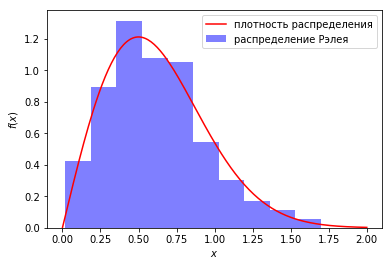

0.6138611180774239
0.572015418484388
ModeResult(mode=array([0.01937338]), count=array([1]))
0.6266570686577501


In [18]:
################################################################################################################
#                                            2) Сгенеририуем выборку                                           #
################################################################################################################
# сгенерим выборку из 1000 значений
r1_points = r1.rvs(1000)
# гистограмма
plt.hist(r1_points, 
           
         normed=True, 
         alpha=0.5, 
         color = 'b',
         label='распределение Рэлея')

# построим теоретическую плотность распределения
pdf1 = r1.pdf(x1)
plt.plot(x1, pdf1, color = 'r', label='плотность распределения')

# отобразим всё на графике
plt.legend(loc='upper right')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

print(np.mean(r1_points))
print(np.median(r1_points))
print(sts.mode(r1_points))

print(math.sqrt(math.pi/2) * sigma_1)

In [20]:
################################################################################################################
#                           3) Сгенерируем 1000 выборок объёма n = 5, 10, 50                                   #
#                              и построим гистограммы распределений их выборочных средних.                     #
################################################################################################################

C:\Users\andri\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


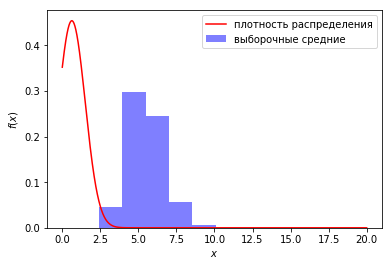

In [19]:
############################################# Объем выборки  n = 5 #############################################

# объем выборки
n = 5

# https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A0%D1%8D%D0%BB%D0%B5%D1%8F

# согласно Вики в распределение Рэлея зависит от х и параметра масштаба
# пусть параметр масштаба U = 3
U = 3

# Как говорит Вики, для распределения Рэлея, 
# мат.ожидание = ((Pi/2)**0.5) * U
# mu = (((2*math.pi)**0.5/2))*U
mu = math.sqrt(math.pi/2) * sigma_1

# дисперсия по Вики = (2-Pi/2)*(U**2)
Disp = ((4-math.pi)/2)*(U**2)

r = sts.rayleigh(loc=mu, scale=Disp)
x = np.linspace(0, 20, 2000)

# массив для средних по выборкам
mean = []

# сгенерим 1000 выборок
for i in range(1000):
    arr_n = np.array(r.rvs(n))
    mean.append(np.sum(arr_n)/n)

# построим гистограмму выборочных средних
plt.hist(mean,
         bins = n,
         histtype='stepfilled',   
         normed=True, 
         alpha=0.5, 
         color = 'b',
         label='выборочные средние')

# нормальное распределение
norm = sts.norm(loc=mu, scale=(Disp/n)**0.5)
#расчитываем значения функции плотности распределения
norm_pdf = norm.pdf(x)
plt.plot(x, norm_pdf, label='плотность распределения', color = 'r')

plt.legend(loc='upper right')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

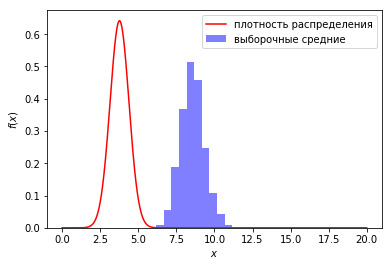

In [36]:
############################################# Объем выборки n = 10 ###############################################

# объем выборки
n = 10

# https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A0%D1%8D%D0%BB%D0%B5%D1%8F

# согласно Вики в распределение Рэлея зависит от х и параметра масштаба
# пусть параметр масштаба U = 3
U = 3

# Как говорит Вики, для распределения Рэлея, 
# мат.ожидание = ((Pi/2)**0.5) * U
mu = (((2*math.pi)**0.5/2))*U

# дисперсия по Вики = (2-Pi/2)*(U**2)
Disp = ((4-math.pi)/2)*(U**2)

r = sts.rayleigh(loc=mu, scale=Disp)
x = np.linspace(0, 20, 2000)

# массив для средних по выборкам
mean = []

# сгенерим 1000 выборок
for i in range(1000):
    arr_n = np.array(r.rvs(n))
    mean.append(np.sum(arr_n)/n)

# построим гистограмму выборочных средних
plt.hist(mean,
         bins = n,
         histtype='stepfilled',   
         normed=True, 
         alpha=0.5, 
         color = 'b',
         label='выборочные средние')

# нормальное распределение
norm = sts.norm(loc=mu, scale=(Disp/n)**0.5)
#расчитываем значения функции плотности распределения
norm_pdf = norm.pdf(x)
plt.plot(x, norm_pdf, label='плотность распределения', color = 'r')

plt.legend(loc='upper right')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

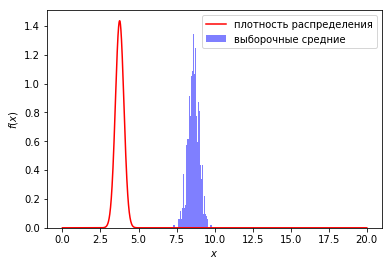

In [44]:
############################################# Объем выборки n = 50 ###############################################

# объем выборки
n = 50

# https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A0%D1%8D%D0%BB%D0%B5%D1%8F

# согласно Вики в распределение Рэлея зависит от х и параметра масштаба
# пусть параметр масштаба U = 3
U = 3

# Как говорит Вики, для распределения Рэлея, 
# мат.ожидание = ((Pi/2)**0.5) * U
mu = (((2*math.pi)**0.5/2))*U

# дисперсия по Вики = (2-Pi/2)*(U**2)
Disp = (2-math.pi/2)*(U**2)

r = sts.rayleigh(loc=mu, scale=Disp)
x = np.linspace(0, 20, 2000)

# массив для средних по выборкам
mean = []

# сгенерим 1000 выборок
for i in range(1000):
    arr_n = np.array(r.rvs(n))
    mean.append(np.sum(arr_n)/n)

# построим гистограмму выборочных средних
plt.hist(mean,
         bins = n,
         histtype='stepfilled',   
         normed=True, 
         alpha=0.5, 
         color = 'b',
         label='выборочные средние')

# нормальное распределение
norm = sts.norm(loc=mu, scale=(Disp/n)**0.5)
#расчитываем значения функции плотности распределения
norm_pdf = norm.pdf(x)
plt.plot(x, norm_pdf, label='плотность распределения', color = 'r')

plt.legend(loc='upper right')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

In [ ]:
В данном решении рассмотрено распределение Рэлея, при увеличении n должна увеличиваться и точность аппроксимации,
однако, где-то в расчетах судя по всему закралась ошибка и на оси Х не сходятся средние и плотность распределения.